# 使用torch.nn实现逻辑回归

In [118]:
import torch
import numpy as np
import matplotlib.pyplot as plt

## 1 人工构造数据集和读取数据

In [119]:
n_data = torch.ones(50, 2) # 数据的基本形态
num_inputs = 2  # 特征维数
x1 = torch.normal(2 * n_data, 1) # shape=(50, 2)
y1 = torch.zeros(50) # 类型0 shape=(50, 1)
x2 = torch.normal(-2 * n_data, 1) # 类型1 shape=(50, 2)
y2 = torch.ones(50) # 类型1 shape=(50, 1)
# 注意 x, y 数据的数据形式是一定要像下面一样 (torch.cat 是在合并数据)
# 将数据分为训练集和验证集 20%为验证集
X_train = torch.cat((x1[10:], x2[10:]), 0).type(torch.FloatTensor)
y_train = torch.cat((y1[10:], y2[10:]), 0).type(torch.FloatTensor)
# 验证集
X_test = torch.cat((x1[:10], x2[:10]), 0).type(torch.FloatTensor)
y_test = torch.cat((y1[:10], y2[:10]), 0).type(torch.FloatTensor)

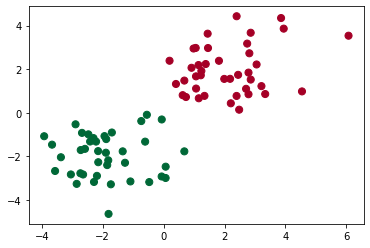

In [120]:
plt.scatter(X_train.data.numpy()[:, 0], X_train.data.numpy()[:, 1], c=y_train.data.numpy(), s=50, cmap='RdYlGn')
plt.show()

In [121]:
import torch.utils.data as Data
import torch.nn as nn
batch_size = 40
# 将训练数据的特征和标签组合
dataset = Data.TensorDataset(X_train, y_train)
# 把dataset 放入 DataLoader
data_iter = Data.DataLoader(
    dataset = dataset,
    batch_size = batch_size,
    shuffle = True,
    num_workers=2)

## 2 定义模型

In [122]:
class LogicalNet(nn.Module):
    def __init__(self, n_feature):
        super(LogicalNet, self).__init__()
        self.linear = nn.Linear(n_feature, 1)
        
    def forward(self, x):
        return self.linear(x)

net = LogicalNet(num_inputs)

## 3 初始化模型参数、定义损失函数和优化器

In [123]:
# 初始化模型参数
from torch.nn import init

init.normal_(net.linear.weight.data, mean=0, std=0.01)
init.constant_(net.linear.bias.data, val=0)
# 定义损失函数
loss = nn.BCEWithLogitsLoss()
# 定义优化器
import torch.optim as optim
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

## 4 训练模型

In [124]:
num_epochs = 30
loss_train = []
loss_test = []
acc_train = []
acc_test = []
for epoch in range(1, num_epochs + 1):
    for X, y in data_iter:
        output = net(X)
        l = loss(output, y.view(output.size()))
        net.zero_grad()  # 梯度清零
        l.backward()
        optimizer.step()
    print('epoch %d, loss:%f'%(epoch, l.item()))
    loss_train.append(l.item())
    loss_test.append(loss(net(X_test), y_test.view(net(X_test).size())).item())
    
    acc_train.append((net(X_train).ge(0.5).float() == y_train.view(net(X_train).size())).float().mean().item())
    acc_test.append((net(X_test).ge(0.5).float() == y_test.view(net(X_test).size())).float().mean().item())

epoch 1, loss:0.669376
epoch 2, loss:0.590916
epoch 3, loss:0.473173
epoch 4, loss:0.363123
epoch 5, loss:0.267343
epoch 6, loss:0.239592
epoch 7, loss:0.188870
epoch 8, loss:0.156634
epoch 9, loss:0.107764
epoch 10, loss:0.118748
epoch 11, loss:0.105710
epoch 12, loss:0.087456
epoch 13, loss:0.084042
epoch 14, loss:0.070897
epoch 15, loss:0.060473
epoch 16, loss:0.055923
epoch 17, loss:0.047537
epoch 18, loss:0.051063
epoch 19, loss:0.042226
epoch 20, loss:0.058939
epoch 21, loss:0.048003
epoch 22, loss:0.061498
epoch 23, loss:0.055762
epoch 24, loss:0.045180
epoch 25, loss:0.043605
epoch 26, loss:0.042828
epoch 27, loss:0.034757
epoch 28, loss:0.052496
epoch 29, loss:0.036281
epoch 30, loss:0.044508


## 5 结果可视化

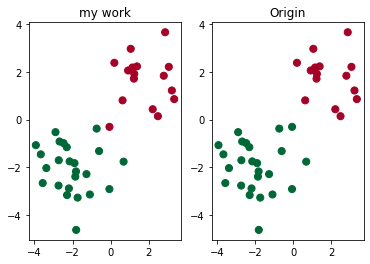

In [125]:
Res = net(X).ge(0.5).float()
plt.subplot(1, 2, 1)
plt.scatter(X.data.numpy()[:, 0], X.data.numpy()[:, 1], c=Res, s=50, cmap='RdYlGn')
plt.title('my work')
plt.subplot(1, 2, 2)
plt.scatter(X.data.numpy()[:, 0], X.data.numpy()[:, 1], c=y.data.numpy(), s=50, cmap='RdYlGn')
plt.title('Origin')
plt.show()

Text(0.5, 1.0, 'acc_test')

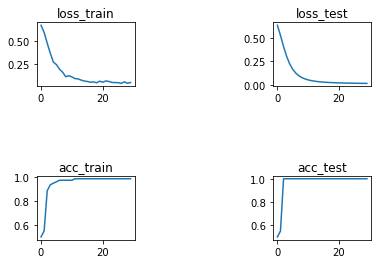

In [126]:
plt.subplot(3,3,1)
plt.plot(range(num_epochs), loss_train)
plt.title('loss_train')
plt.subplot(3,3,3)
plt.plot(range(num_epochs), loss_test)
plt.title('loss_test')
plt.subplot(3,3,7)
plt.plot(range(num_epochs), acc_train)
plt.title('acc_train')
plt.subplot(3,3,9)
plt.plot(range(num_epochs), acc_test)
plt.title('acc_test')